# Problem Set 3

# Question 1

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [2]:
# Import python libraries
# Import panda library as pd
import pandas as pd

In [6]:
# Import dataset in given address in assignment

given_url = (
    'https://raw.githubusercontent.com/'
    'justmarkham/DAT8/master/data/u.user'
)

In [16]:
# Assign to a variable called users
users = pd.read_csv(given_url, sep='|')# The data is separated by '|' to match the file's structure
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
# Discover what is the mean age per occupation

# Calculating the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean().reset_index()

# Displaying the results using pandas
print("Mean Age per Occupation:")
print("-" * 40)

# Formatting and displaying the DataFrame with alignment similar to your previous output
mean_age_per_occupation.columns = ['Occupation', 'Mean Age']
mean_age_per_occupation['Mean Age'] = mean_age_per_occupation['Mean Age'].apply(lambda x: f"{x:.2f} years")

# Printing the formatted table
print(mean_age_per_occupation.to_string(index=False))


Mean Age per Occupation:
----------------------------------------
   Occupation    Mean Age
administrator 38.75 years
       artist 31.39 years
       doctor 43.57 years
     educator 42.01 years
     engineer 36.39 years
entertainment 29.22 years
    executive 38.72 years
   healthcare 41.56 years
    homemaker 32.57 years
       lawyer 36.75 years
    librarian 40.00 years
    marketing 37.62 years
         none 26.56 years
        other 34.52 years
   programmer 33.12 years
      retired 63.07 years
     salesman 35.67 years
    scientist 35.55 years
      student 22.08 years
   technician 33.15 years
       writer 36.31 years


In [21]:
# Discover the Male ratio per occupation and sort it from the most to the least

# Count the total number of males and total number of users per occupation
total_users_per_occupation = users.groupby('occupation')['gender'].count()
total_males_per_occupation = users[users['gender'] == 'M'].groupby('occupation')['gender'].count()

# Calculate the male ratio per occupation
male_ratio_per_occupation = (total_males_per_occupation / total_users_per_occupation).reset_index()

# Rename the columns for clarity
male_ratio_per_occupation.columns = ['Occupation', 'Male Ratio']

# Sort the values by male ratio from highest to lowest
male_ratio_per_occupation_sorted = male_ratio_per_occupation.sort_values(by='Male Ratio', ascending=False)

# Format the Male Ratio column as a percentage
male_ratio_per_occupation_sorted['Male Ratio'] = (male_ratio_per_occupation_sorted['Male Ratio'] * 100).apply(lambda x: f"{x:.2f}%")

# Print the results
print("Male Ratio per Occupation (Sorted):")
print("-" * 50)
print(f"{'Occupation':<20} | {'Male Ratio (%)':<15}")
print("-" * 50)
print(male_ratio_per_occupation_sorted.to_string(index=False))



Male Ratio per Occupation (Sorted):
--------------------------------------------------
Occupation           | Male Ratio (%) 
--------------------------------------------------
   Occupation Male Ratio
       doctor    100.00%
     engineer     97.01%
   technician     96.30%
      retired     92.86%
   programmer     90.91%
    executive     90.62%
    scientist     90.32%
entertainment     88.89%
       lawyer     83.33%
     salesman     75.00%
     educator     72.63%
      student     69.39%
        other     65.71%
    marketing     61.54%
       writer     57.78%
         none     55.56%
administrator     54.43%
       artist     53.57%
    librarian     43.14%
   healthcare     31.25%
    homemaker     14.29%


In [24]:
# For each occupation, calculate the minimum and maximum ages

# Calculating the minimum and maximum ages per occupation using describe
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(min_age=('min'), max_age=('max')).reset_index()

# Printing the results
print("Minimum and Maximum Ages per Occupation:")
print("-" * 50)

# Print the DataFrame directly for a cleaner output
print(f"{'Occupation':<20} | {'Min Age':<8} | {'Max Age':<8}")
print("-" * 50)

for index, row in min_max_age_per_occupation.iterrows():
    print(f"{row['occupation']:<20} | {row['min_age']:<8} | {row['max_age']:<8}")


Minimum and Maximum Ages per Occupation:
--------------------------------------------------
Occupation           | Min Age  | Max Age 
--------------------------------------------------
administrator        | 21       | 70      
artist               | 19       | 48      
doctor               | 28       | 64      
educator             | 23       | 63      
engineer             | 22       | 70      
entertainment        | 15       | 50      
executive            | 22       | 69      
healthcare           | 22       | 62      
homemaker            | 20       | 50      
lawyer               | 21       | 53      
librarian            | 23       | 69      
marketing            | 24       | 55      
none                 | 11       | 55      
other                | 13       | 64      
programmer           | 20       | 63      
retired              | 51       | 73      
salesman             | 18       | 66      
scientist            | 23       | 55      
student              | 7        | 42    

In [23]:
# For each combination of occupation and sex, calculate the mean age

# Using pivot_table to calculate the mean age per combination of occupation and gender
mean_age_per_occupation_sex = users.pivot_table(values='age', index='occupation', columns='gender', aggfunc='mean')

# Printing the results
print("Mean Age per Occupation and Sex:")
print("-" * 50)
print(f"{'Occupation':<20} | {'Male Mean Age':<15} | {'Female Mean Age':<15}")
print("-" * 50)

# Iterating through the pivot table and printing the results
for occupation, row in mean_age_per_occupation_sex.iterrows():
    male_age = f"{row.get('M', 'N/A'):.2f}" if not pd.isna(row.get('M')) else 'N/A'
    female_age = f"{row.get('F', 'N/A'):.2f}" if not pd.isna(row.get('F')) else 'N/A'
    print(f"{occupation:<20} | {male_age:<15} | {female_age:<15}")


Mean Age per Occupation and Sex:
--------------------------------------------------
Occupation           | Male Mean Age   | Female Mean Age
--------------------------------------------------
administrator        | 37.16           | 40.64          
artist               | 32.33           | 30.31          
doctor               | 43.57           | N/A            
educator             | 43.10           | 39.12          
engineer             | 36.60           | 29.50          
entertainment        | 29.00           | 31.00          
executive            | 38.17           | 44.00          
healthcare           | 45.40           | 39.82          
homemaker            | 23.00           | 34.17          
lawyer               | 36.20           | 39.50          
librarian            | 40.00           | 40.00          
marketing            | 37.88           | 37.20          
none                 | 18.60           | 36.50          
other                | 34.03           | 35.47          
programmer

In [25]:
# Step: Calculate the percentage of women and men for each occupation

# Calculate the total number of people per occupation
total_per_occupation = users.groupby('occupation')['gender'].count().reset_index()

# Calculate the number of males and females per occupation
gender_count_per_occupation = users.groupby(['occupation', 'gender'])['gender'].count().unstack(fill_value=0).reset_index()

# Merge the two DataFrames
occupation_gender_percentage = gender_count_per_occupation.merge(total_per_occupation, on='occupation')

# Calculate the percentage for each gender
occupation_gender_percentage['Male Percentage (%)'] = round((occupation_gender_percentage['M'] / occupation_gender_percentage['gender']) * 100, 2)
occupation_gender_percentage['Female Percentage (%)'] = round((occupation_gender_percentage['F'] / occupation_gender_percentage['gender']) * 100, 2)

# Select the columns to display
final = occupation_gender_percentage[['occupation', 'Male Percentage (%)', 'Female Percentage (%)']]

# Print the result
print("Percentage of Men and Women in Each Occupation:")
print(final)


Percentage of Men and Women in Each Occupation:
       occupation  Male Percentage (%)  Female Percentage (%)
0   administrator                54.43                  45.57
1          artist                53.57                  46.43
2          doctor               100.00                   0.00
3        educator                72.63                  27.37
4        engineer                97.01                   2.99
5   entertainment                88.89                  11.11
6       executive                90.62                   9.38
7      healthcare                31.25                  68.75
8       homemaker                14.29                  85.71
9          lawyer                83.33                  16.67
10      librarian                43.14                  56.86
11      marketing                61.54                  38.46
12           none                55.56                  44.44
13          other                65.71                  34.29
14     programmer     

# Question 2

Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team



In [32]:
# Import the necessary libraries

import pandas as pd

# Import the dataset from this address

euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv", delimiter = ',')

# Assign it to a variable called euro12

euro12



,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0.0,1,7,5,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,3016,2531,83.9%,4363,75,75,30,98,137,136,1.0,2,18,7,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,1556,1381,88.7%,2163,50,49,22,34,41,41,0.0,0,9,5,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,1,1059,852,80.4%,1724,55,39,14,67,87,62,0.0,0,8,3,6,66.7%,48,56,3,7,1,7,7,17


In [33]:
# Select only the Goal column using dot notation
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [34]:
# How many teams participated in the Euro2012?

team_total = euro12['Team'].nunique()
print("Total Teams Participated In Euro 2012: ", team_total)

Total Teams Participated In Euro 2012:  16


In [36]:
# What is the number of columns in the dataset?

no_of_columns = len(euro12.columns)
print(f"Total Number Of Columns In Euro12 Dataset are: {no_of_columns}")

Total Number Of Columns In Euro12 Dataset are: 35


In [38]:
# View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
print("Countries In Euro-12 With Total Yellow & Red Cards\n") 

discipline = euro12.loc[:, ['Team', 'Yellow Cards', 'Red Cards']]  # Using loc to select specific columns by name

discipline # Display the DataFrame


Countries In Euro-12 With Total Yellow & Red Cards



,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [39]:
# Sort the teams by Red cards, then to Yellow Cards

discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False) # Sorting the discipline DataFrame by Red Cards first, then by Yellow Cards in descending order

discipline_sorted # Display the sorted DataFrame

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [41]:
#  Calculate the mean Yellow Cards given per Team
print("Mean Yellow Cards per Team \n")
mean_yellow_cards = euro12.groupby('Team').agg({'Yellow Cards': 'mean'})
print(mean_yellow_cards)


Mean Yellow Cards per Team 

                     Yellow Cards
Team                             
Croatia                       9.0
Czech Republic                7.0
Denmark                       4.0
England                       5.0
France                        6.0
Germany                       4.0
Greece                        9.0
Italy                        16.0
Netherlands                   5.0
Poland                        7.0
Portugal                     12.0
Republic of Ireland           6.0
Russia                        6.0
Spain                        11.0
Sweden                        7.0
Ukraine                       5.0


In [45]:
# Filter teams that scored more than 6 goals

teams_more_than_6_goals = euro12.query('Goals > 6')

print("*******************************************")
print("   Teams that Scored More Than 6 Goals")
print("*******************************************")        # Adding edits and styles

output_lines = [f"Team: {row['Team']} - {row['Goals']}" for index, row in teams_more_than_6_goals.iterrows()] # Creating formatted strings for each team and goal

print("\n".join(output_lines)) # Printing all lines in one go

print("*******************************************")



 


*******************************************
   Teams that Scored More Than 6 Goals
*******************************************
Team: Germany - 10
Team: Spain - 12
*******************************************


In [46]:
# Select the teams that start with G

print("Teams That Start With 'G'") # Print teams that start with 'G'

teams_starting_with_g = euro12.query('Team.str.startswith("G")', engine='python')['Team']
print(teams_starting_with_g.to_list())   # Using the query method to filter teams

Teams That Start With 'G'
['Germany', 'Greece']


In [47]:
# Select the first 7 columns

print("First 7 Columns")
print(euro12.loc[:, euro12.columns[:7]])


First 7 Columns
                   Team  Goals  Shots on target  Shots off target Shooting Accuracy % Goals-to-shots  Total shots (inc. Blocked)
0               Croatia      4               13                12             51.9%            16.0%                          32
1        Czech Republic      4               13                18             41.9%            12.9%                          39
2               Denmark      4               10                10             50.0%            20.0%                          27
3               England      5               11                18             50.0%            17.2%                          40
4                France      3               22                24             37.9%             6.5%                          65
5               Germany     10               32                32             47.8%            15.6%                          80
6                Greece      5                8                18             30.

In [50]:
# Select all columns except the last 3

print("All Columns Except Last 3")
euro12.iloc[:, :-3]


All Columns Except Last 3


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0.0,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,3016,2531,83.9%,4363,75,75,30,98,137,136,1.0,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,1556,1381,88.7%,2163,50,49,22,34,41,41,0.0,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,1,1059,852,80.4%,1724,55,39,14,67,87,62,0.0,0,8,3,6,66.7%,48,56,3,7,1


In [51]:
# Present only the Shooting Accuracy from England, Italy and Russia
print("Shooting Accuracy For Italy, England & Russia \n")

selected_teams = euro12.query('Team in ["Italy", "England", "Russia"]')

print(selected_teams[['Team', 'Shooting Accuracy']])


Shooting Accuracy For Italy, England & Russia 

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [53]:
# Import the necessary libraries
import numpy as np
import pandas as pd

In [54]:
# Create 3 differents Series, each of length 100, as follows:
s1 = pd.Series(np.random.choice([1, 2, 3], size=100))
s2 = pd.Series(np.random.choice([1, 2], size=100))
s3 = pd.Series(np.random.uniform(10000, 30000, size=100).astype(int))

print(s1.head())
print(s2.head())
print(s3.head())

0    3
1    3
2    3
3    1
4    3
dtype: int32
0    2
1    1
2    1
3    1
4    2
dtype: int32
0    23908
1    17230
2    10864
3    11042
4    18875
dtype: int32


In [55]:
# Create a DataFrame by joining the Series by column
df = pd.concat([s1, s2, s3], axis=1, keys=['s1', 's2', 's3'])

print(df.head())

   s1  s2     s3
0   3   2  23908
1   3   1  17230
2   3   1  10864
3   1   1  11042
4   3   2  18875


In [58]:
# Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

print(df.head())



   bedrs  bathrs  price_sqr_meter
0      3       2            23908
1      3       1            17230
2      3       1            10864
3      1       1            11042
4      3       2            18875


In [64]:
# Create a DataFrame with one column 'bigcolumn' from the combined Series
big_column_df = pd.DataFrame({'bigcolumn': pd.Series(np.concatenate([s1.values, s2.values, s3.values]))})

print(big_column_df.head())

   bigcolumn
0          3
1          3
2          3
3          1
4          3


In [66]:
# Ops it seems it is going only until index 99. Is it true?

index_range = big_column_df.index[-1]
if index_range == 100:
    print("No Index range is going till 100.\n")
else:
    print(f"Yes It is Going Only Till 99 & Not 100.\n ")
print(big_column_df)


Yes It is Going Only Till 99 & Not 100.
 
     bigcolumn
0            3
1            3
2            3
3            1
4            3
..         ...
295      27491
296      16014
297      13783
298      16357
299      27122

[300 rows x 1 columns]


In [68]:
# Reindex the DataFrame so it goes from 0 to 299
df2 = big_column_df.reset_index(drop=True)  
print(df2)


     bigcolumn
0            3
1            3
2            3
3            1
4            3
..         ...
295      27491
296      16014
297      13783
298      16357
299      27122

[300 rows x 1 columns]


# Question 4

Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.


In [70]:
#  Import the necessary libraries
import numpy as np
import pandas as pd
import datetime as dt

In [72]:
# Import the dataset from the attached file wind.txt
data = pd.read_fwf('wind.txt')

In [74]:
#  Assign it to a variable called data and replace the first 3 columns by a proper 
data.columns = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Set the Date column as the index and drop the original columns
data = data.set_index('Date').drop(columns=['Yr', 'Mo', 'Dy'])


data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [75]:
# Year 2061? Do we really have data from this year? Create a function to fix it and apply it
def fix_years(df):

    df.index = df.index.where(df.index.year < 2060, df.index - pd.DateOffset(years=100))
    return df

data = fix_years(data)

data


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [76]:
# . Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]
data.index = pd.to_datetime(data.index)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [77]:
#  Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below
missing_values = data.isna().sum()
print("Missing values per location:")
print(missing_values)
print("\nTotal missing values :",missing_values.sum())

Missing values per location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total missing values : 31


In [78]:
# Compute how many non-missing values there are in total
print(f"Total non-missing values: {np.prod(data.shape) - data.isnull().sum().sum()}")

Total non-missing values: 78857


In [79]:
# . Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed = data.mean().mean()
print("Mean windspeeds over all locations and times: ",mean_windspeed)

print("After rounding off ",round(mean_windspeed))

Mean windspeeds over all locations and times:  10.227982360836938
After rounding off  10


In [80]:
# Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
print("Location statistics:")
print(loc_stats)


Location statistics:
            RPT        VAL        ROS        KIL        SHA        BIR        DUB        CLA        MUL        CLO        BEL        MAL
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   0.000000   0.000000   0.000000   0.040000   0.130000   0.670000
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000  30.370000  31.080000  25.880000  28.210000  42.380000  42.540000
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   4.977555   4.499449   4.166872   4.503954   5.835037   6.699794


In [81]:
# Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)

day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [82]:
#  Find the average windspeed in January for each location
data_january = data[data.index.month == 1]


average_january_windspeed = data_january.groupby(data_january.index.year).mean()
print("Average windspeed in January for each location:\n")
print(average_january_windspeed)

Average windspeed in January for each location:

            RPT        VAL        ROS        KIL        SHA        BIR        DUB        CLA        MUL        CLO        BEL        MAL
Date                                                                                                                                    
1961  14.841333  11.988333  13.431613   7.736774  11.072759   8.588065  11.184839   9.245333   9.085806  10.107419  13.880968  14.703226
1962  14.783871  13.160323  12.591935   7.538065  11.779677   8.720000  14.211935   9.600000   9.670000  11.498710  16.369355  15.661613
1963  14.868387  11.112903  15.121613   6.635806  11.080645   7.835484  12.797419   9.844839   7.841613   9.390000  11.428710  18.822258
1964  12.661290  11.818387  11.741290   6.953548  11.400645   6.865806   9.592903   9.687419   6.947742   9.676774  15.067419  14.145484
1965  15.741613  15.546774  15.274194   8.258387  13.588065   9.251290  13.850968  11.260000   9.899355  11.706129  16.196129  17

In [83]:
# Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()
print("Yearly downsampled data:\n")
print(yearly_data)

Yearly downsampled data:

                  RPT        VAL        ROS       KIL        SHA       BIR        DUB        CLA       MUL        CLO        BEL        MAL
Date                                                                                                                                       
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   9.733923   8.858788  8.647652   9.835577  13.502795  13.680773
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068  11.020712   8.793753  8.316822   9.676247  12.930685  14.323956
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712  11.075699  10.336548  8.903589  10.224438  13.638877  14.999014
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874  10.259153   9.467350  7.789016  10.207951  13.740546  14.910301
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110  10.618712   8.879918  7.907425   9.918082  12.964247  15.5

In [84]:
# Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()
print("Monthly downsampled data:\n")
print(monthly_data)

Monthly downsampled data:

                  RPT        VAL        ROS       KIL        SHA        BIR        DUB        CLA        MUL        CLO        BEL        MAL
Date                                                                                                                                         
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065  11.184839   9.245333   9.085806  10.107419  13.880968  14.703226
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500  11.890714  11.846071  11.821429  12.714286  18.583214  15.411786
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   9.644194   9.829677  10.294138  11.251935  16.410968  15.720000
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   6.925333   7.094667   7.342333   7.237000  11.147333  10.278333
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   7.604000   8.177097   8.039355   8.499355  

In [85]:
# Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()
print("Weekly downsampled data:\n")
print(weekly_data)

Weekly downsampled data:

                  RPT        VAL        ROS        KIL        SHA        BIR        DUB        CLA        MUL        CLO        BEL        MAL
Date                                                                                                                                          
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000  13.670000  10.250000  10.830000  12.580000  18.500000  15.040000
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714  11.061429   6.616667   8.434286   8.497143  12.481429  13.238571
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   7.535714   6.820000   5.712857   7.571429  11.125714  11.024286
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   9.257143   7.875714   7.145714   8.124286   9.821429  11.434286
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571  15.528571  15.160000  14.480000  15.64

In [86]:
# Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks
weekly_stats = data.resample('W', origin='1961-01-02').agg(['min', 'max', 'mean', 'std'])
weekly_stats_52_weeks = weekly_stats.head(52)
print("Weekly statistics for the first 52 weeks:\n")
print(weekly_stats_52_weeks)

Weekly statistics for the first 52 weeks:

              RPT                                VAL                                ROS                               KIL                                SHA                               BIR                                DUB                                CLA                                MUL                                CLO                                BEL                                MAL                            
              min    max       mean       std    min    max       mean       std    min    max       mean       std   min    max       mean       std    min    max       mean       std   min    max       mean       std    min    max       mean       std    min    max       mean       std    min    max       mean       std    min    max       mean       std    min    max       mean       std    min    max       mean       std
Date                                                                                               

# Question 5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [87]:
#  Import the necessary libraries
import pandas as pd

In [88]:
# Import dataset from this address
chipo=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')

In [89]:
# Assign it to a variable called chipo
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [90]:
# See the first 10 entries
print(chipo.head(10))

   order_id  quantity                              item_name                                 choice_description item_price
0         1         1           Chips and Fresh Tomato Salsa                                                NaN     $2.39 
1         1         1                                   Izze                                       [Clementine]     $3.39 
2         1         1                       Nantucket Nectar                                            [Apple]     $3.39 
3         1         1  Chips and Tomatillo-Green Chili Salsa                                                NaN     $2.39 
4         2         2                           Chicken Bowl  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98 
5         3         1                           Chicken Bowl  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98 
6         3         1                          Side of Chips                                                NaN     $1.69 
7         4     

In [91]:
#  What is the number of observations in the dataset?
print("Number of observation here is:", len(chipo))

Number of observation here is: 4622


In [92]:
#  What is the number of columns in the dataset?
print("The number of column here  is:", len(chipo.columns))

The number of column here  is: 5


In [93]:
#  Print the name of all the columns.
print("Column names in the dataset are : ", chipo.columns.values)

Column names in the dataset are :  ['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


In [94]:
# How is the dataset indexed?
print("The dataset is indexed as ")
chipo.index

The dataset is indexed as 


RangeIndex(start=0, stop=4622, step=1)

In [95]:
#  Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("The most ordered item is :",most_ordered_item)


The most ordered item is : Chicken Bowl


In [96]:
# For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("The item order count is ",most_ordered_item_count)

The item order count is  761


In [97]:
# What was the most ordered item in the choice_description column?
print("The Most Ordered Item In Choice_Desc: ", chipo.groupby('choice_description').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).head(1).index[0])
     

The Most Ordered Item In Choice_Desc:  [Diet Coke]


In [98]:
# How many items were orderd in total?
total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)

4972


In [99]:
# Step 13.Turn the item price into a float. Check the item price type. Create a lambda function and change the type of item price.Check the item price type
chipo['item_price'] = chipo['item_price'].replace('[$,]', '', regex=True).astype(float)
print(" changed type : ",chipo['item_price'].dtype)
chipo['item_price'] = chipo['item_price'].apply(lambda x: int(x))
print("New changed type : ",chipo['item_price'].dtype)

 changed type :  float64
New changed type :  int64


In [100]:
# How much was the revenue for the period in the dataset?
print("Total Revenue : ", (chipo['item_price'] * chipo['quantity']).sum())


Total Revenue :  36616


In [101]:
# How many orders were made in the period?
print("Total Orders :", chipo['quantity'].sum())

num_orders = chipo['order_id'].nunique()
print("Total unique orders : ",num_orders)

Total Orders : 4972
Total unique orders :  1834


In [102]:
# What is the average revenue amount per order?
print("Average Revenue per Order: ", (chipo['item_price'] * chipo['quantity']).mean())

Average Revenue per Order:  7.922111639982692


In [103]:
# How many different items are sold?
num_different_items = chipo['item_name'].nunique()
print("Different Items Sold : ",num_different_items)


Different Items Sold :  50


# Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [107]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


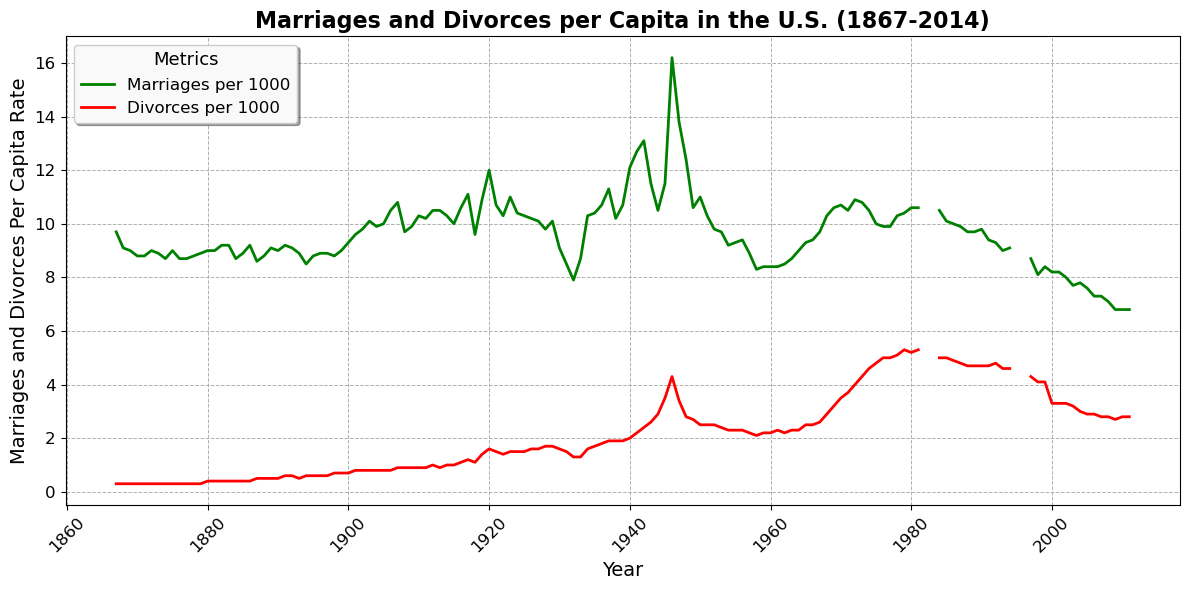

In [110]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'Year', 'Marriages_per_1000', and 'Divorces_per_1000'

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each line separately with specific colors
df.plot(x='Year', y='Marriages_per_1000', ax=ax, color='green', label='Marriages per 1000', linewidth=2)
df.plot(x='Year', y='Divorces_per_1000', ax=ax, color='red', label='Divorces per 1000', linewidth=2)

# Customize the plot
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Marriages and Divorces Per Capita Rate', fontsize=14)

# Customize the legend
legend = plt.legend(title='Metrics', title_fontsize='13', fontsize='12', loc='upper left', fancybox=True, shadow=True)
legend.get_frame().set_facecolor('#f9f9f9')  # Light grey background for the legend

# Customize grid and ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()




# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!


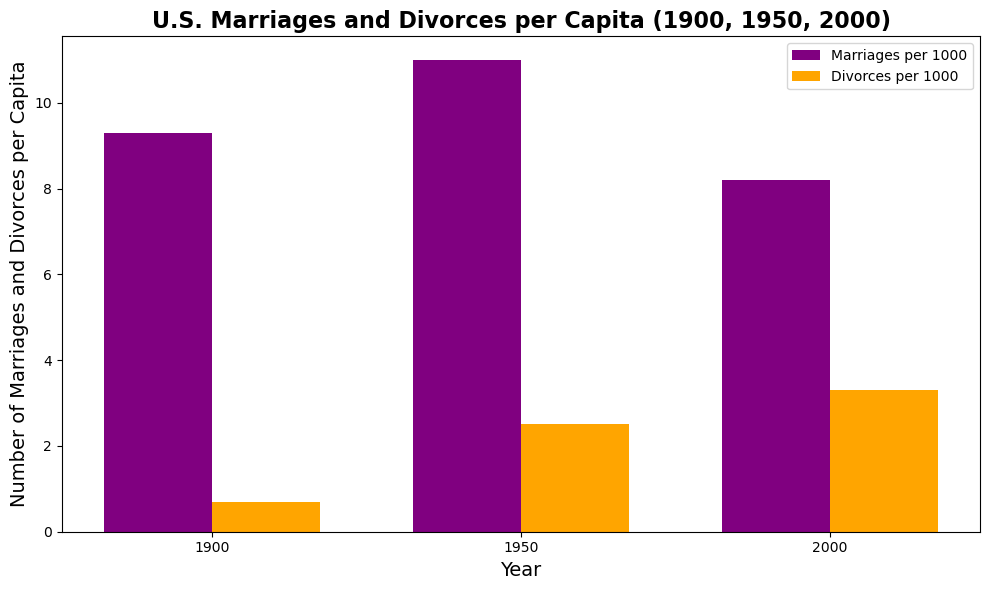

In [114]:
import matplotlib.pyplot as plt

# Data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
marriages_per_capita = [df.loc[df['Year'] == 1900, 'Marriages_per_1000'].values[0],
                        df.loc[df['Year'] == 1950, 'Marriages_per_1000'].values[0],
                        df.loc[df['Year'] == 2000, 'Marriages_per_1000'].values[0]]
divorces_per_capita = [df.loc[df['Year'] == 1900, 'Divorces_per_1000'].values[0],
                       df.loc[df['Year'] == 1950, 'Divorces_per_1000'].values[0],
                       df.loc[df['Year'] == 2000, 'Divorces_per_1000'].values[0]]

bar_width = 0.35
index = range(len(years))

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars with custom colors
bar1 = ax.bar(index, marriages_per_capita, bar_width, label='Marriages per 1000', color='purple')
bar2 = ax.bar([i + bar_width for i in index], divorces_per_capita, bar_width, label='Divorces per 1000', color='orange')

# Setting the labels and titles
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Marriages and Divorces per Capita', fontsize=14)  # Updated Y-axis label
ax.set_title('U.S. Marriages and Divorces per Capita (1900, 1950, 2000)', fontsize=16, fontweight='bold')

# Setting the x-ticks and labels to display the years properly
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(years)

# Adding legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Question 8


Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

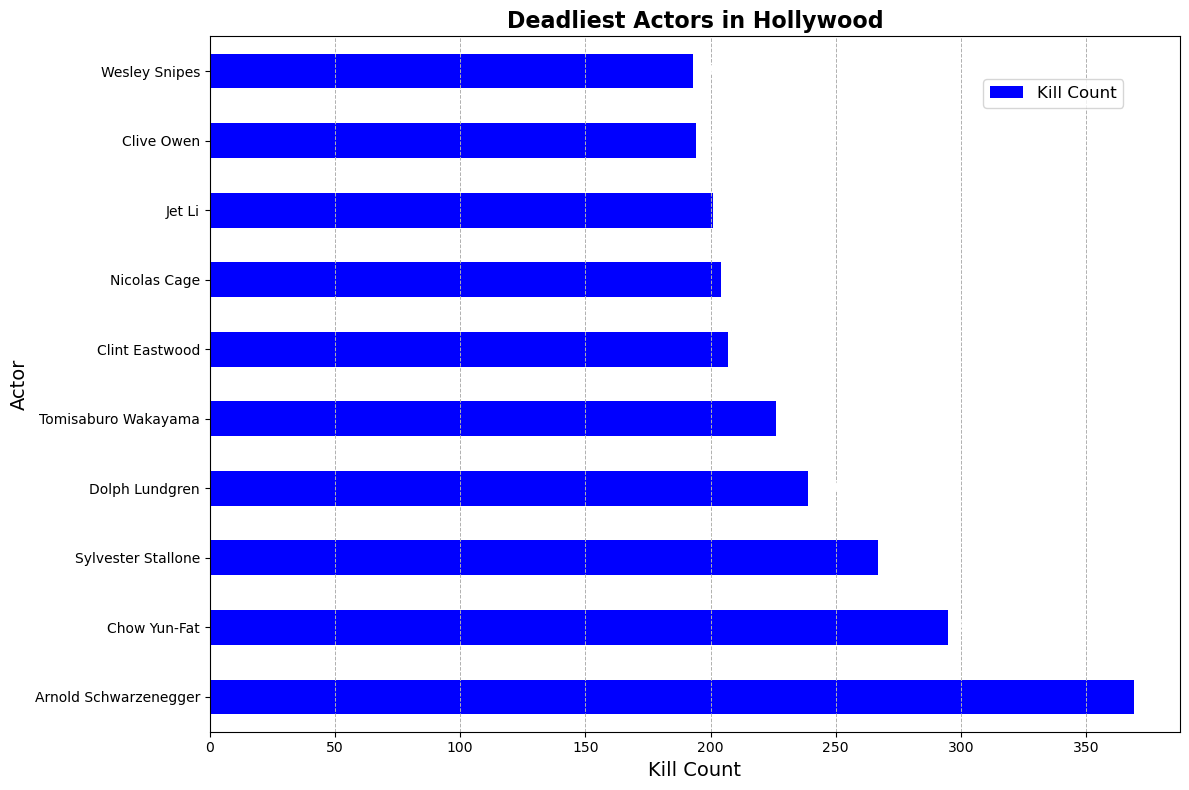

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the CSV file 'actor_kill_counts.csv' is properly loaded with 'Actor' and 'Count' columns
kills = pd.read_csv('actor_kill_counts.csv')

# Sort the DataFrame by 'Count' column in descending order
kills = kills.sort_values(by='Count', ascending=False)

# Plotting the bar chart
ax = kills.plot.barh(x='Actor', y='Count', color='blue', figsize=(12, 8))

# Add labels to each bar with corresponding kill count
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{int(width)}', va='center', ha='left', fontsize=12, color='white')

# Set the x and y labels
plt.xlabel('Kill Count', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Set the title of the chart
plt.title('Deadliest Actors in Hollywood', fontsize=16, fontweight='bold')

# Place the legend inside the graph (upper right corner as an example)
plt.legend(['Kill Count'], loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize=12)

# Add grid lines to the x-axis
plt.grid(axis='x', linestyle='--', linewidth=0.7)

# Adjust layout to ensure nothing is cut off
plt.tight_layout()

# Display the plot
plt.show()


# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories

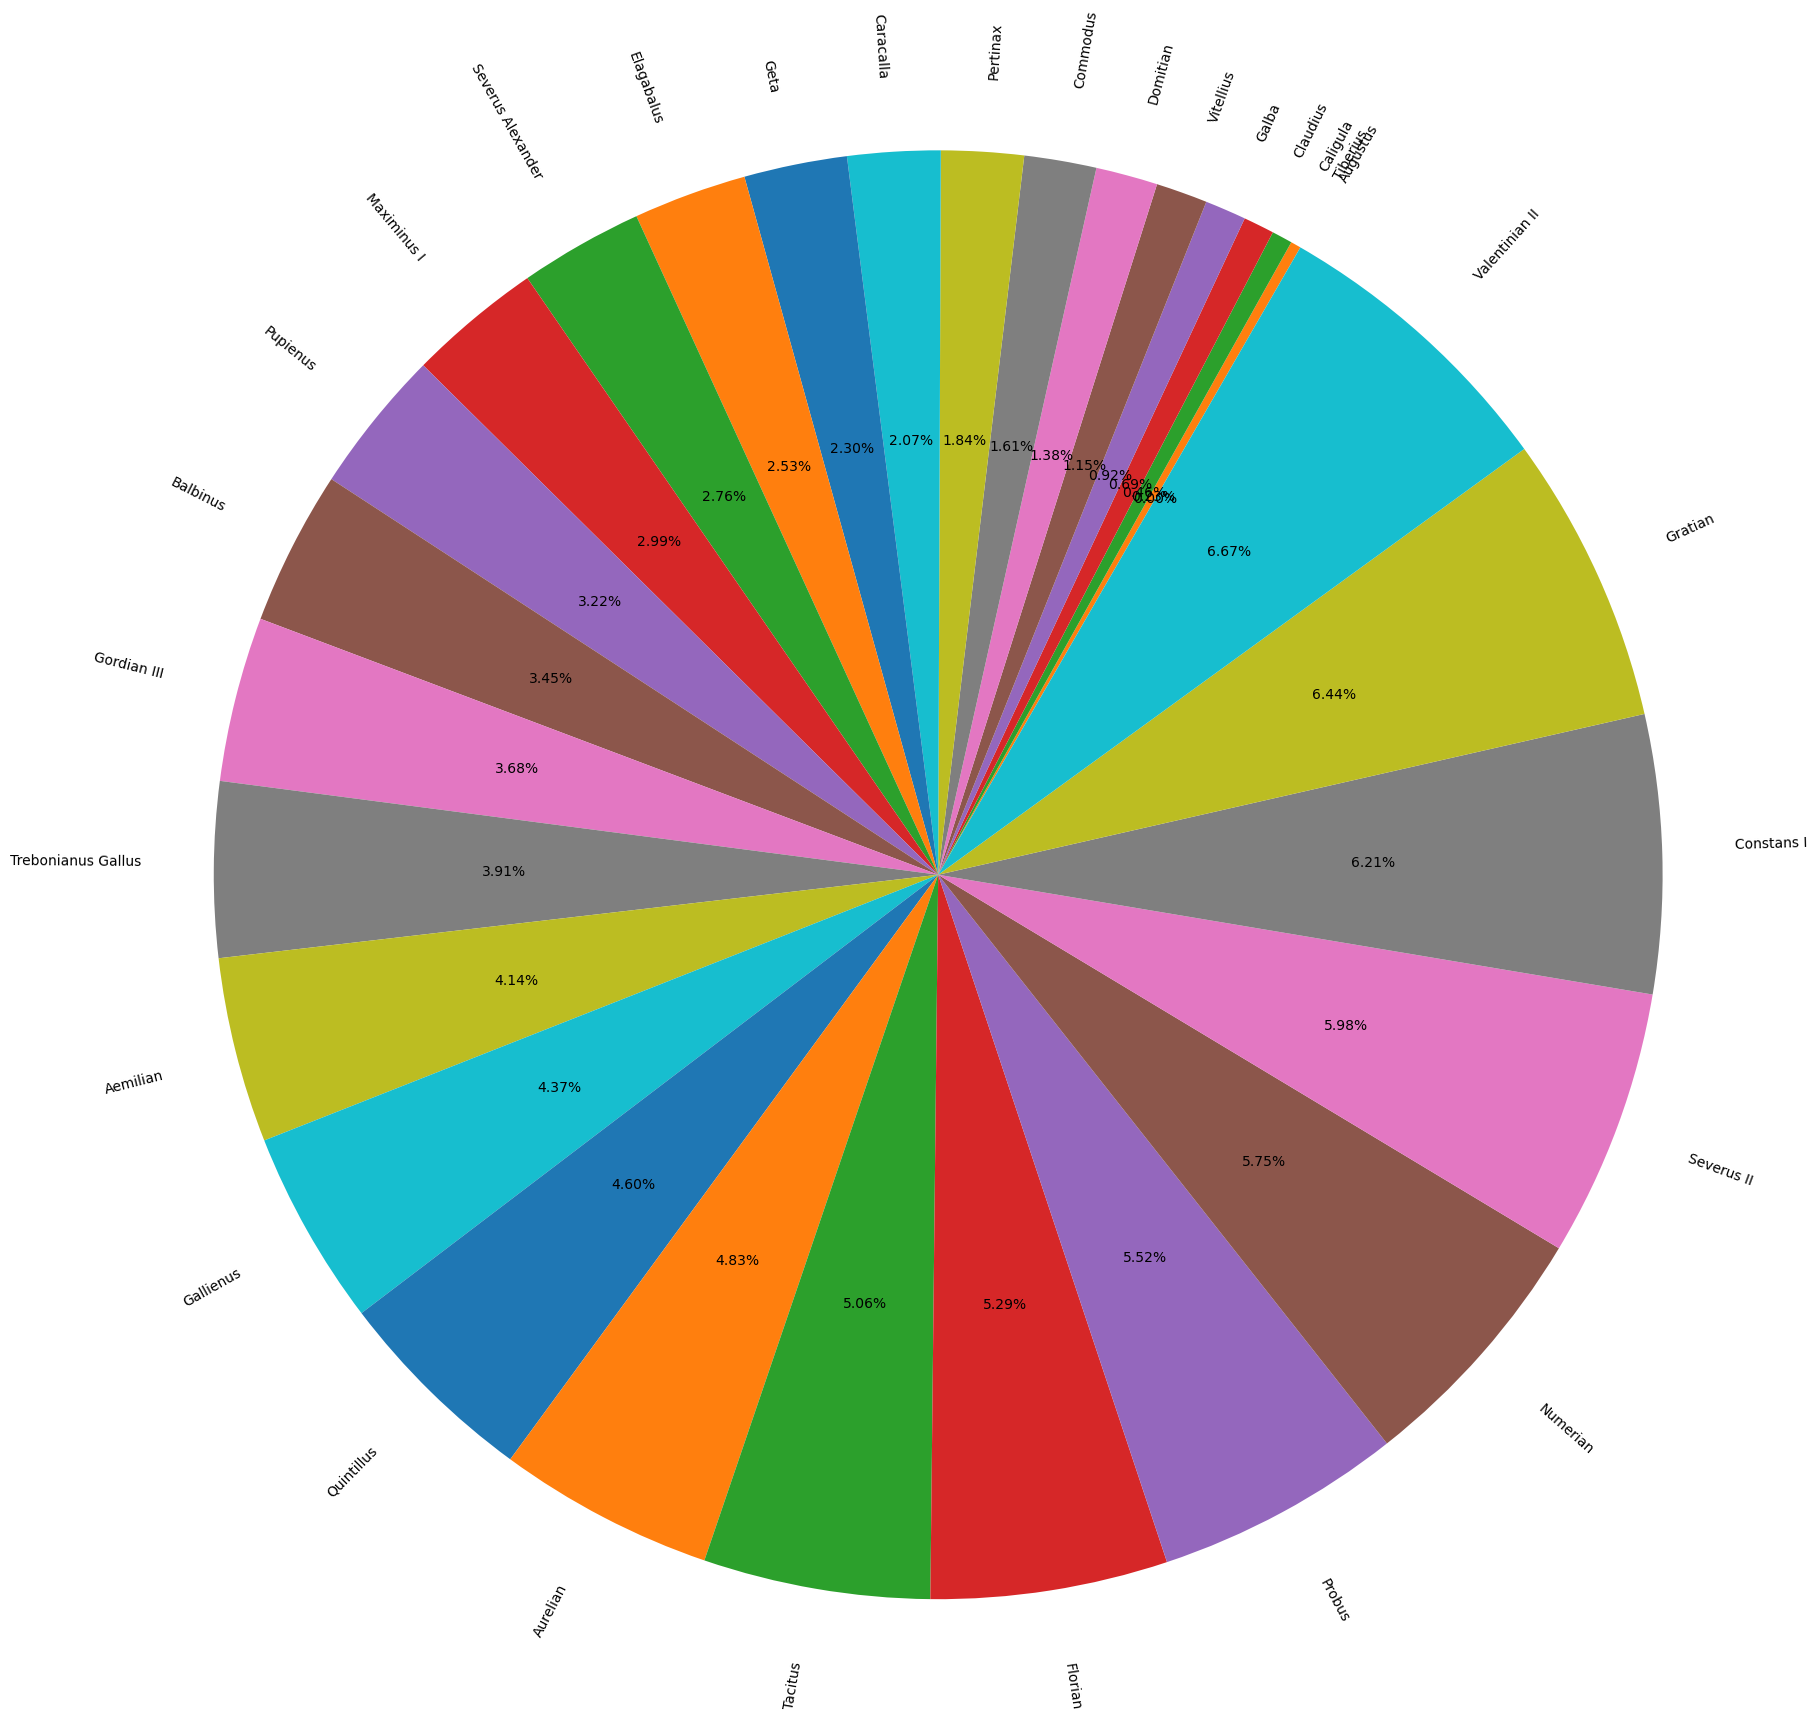

<Figure size 1800x2800 with 0 Axes>

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
ass_emp = roman_emperors[
roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]


number_assassinated = len(ass_emp)

other_deaths = len(roman_emperors) - number_assassinated
emperor = ass_emp["Emperor"]
cause_of_death = ass_emp["Cause_of_Death"]
plt.pie(range(len(cause_of_death)), labels=emperor,autopct='%1.2f%%', startangle=60, radius=0.049 * 100,rotatelabels = 290)
fig = plt.figure(figsize=[18, 28])
     

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

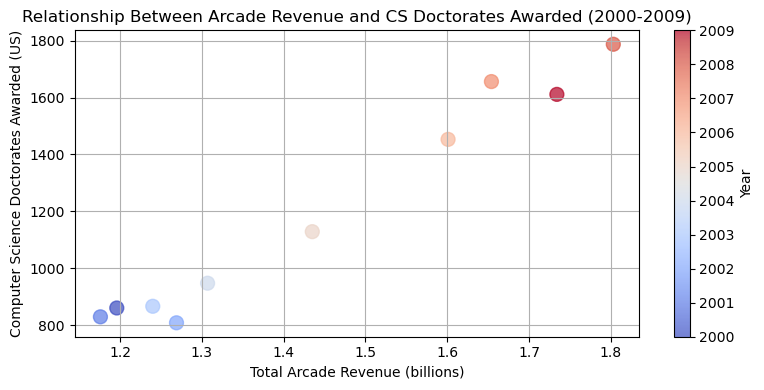

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Create the scatter plot
plt.figure(figsize=[8, 4])
scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'],
    data['Computer Science Doctorates Awarded (US)'],
    c=data['Year'],
    cmap='coolwarm',  # Changed the colormap to 'coolwarm'
    s=100,
    alpha=0.7
)

# Add color bar and labels
plt.colorbar(scatter, label='Year')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship Between Arcade Revenue and CS Doctorates Awarded (2000-2009)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
